In [1]:
import pandas as pd
import numpy as np

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# For date time analysis
from datetime import datetime

# to read data from websites
from pandas_datareader import data

In [4]:
# Companies in spotlight
companies = ['ORCL', 'TSLA', 'IBM','AMZN']
ls_companies = [] ## to create a list of datasets

In [6]:
# Lets get the start and end date
end = datetime.now() # this will get the date today
start = datetime(end.year-2,end.month,end.day)

In [7]:
# read All the data from yahoo and store it in a list
for stock in companies:
    ls_companies.append(data.DataReader(stock,'yahoo',start=start,end=end))

In [9]:
ORCL = ls_companies[0]
TSLA = ls_companies[1]
IBM = ls_companies[2]
AMZN = ls_companies[3]

In [94]:

TSLA.sample(10)

,High,Low,Open,Close,Volume,Adj Close,10_avg,15_avg,28_avg,50_avg,Daily Returns,ret_status
Date,,,,,,,,,,,,
2020-06-22,201.776001,198.003998,199.990005,198.863998,31812000.0,198.863998,196.756798,190.697598,178.253357,166.099721,-0.006574,N
2021-01-12,868.000000,827.340027,831.000000,849.440002,46270700.0,849.440002,764.398999,727.042000,680.242859,586.637001,0.047153,P
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,47.884000,48.142933,46.368572,NaN,-0.005204,N
2020-02-07,153.949997,146.000000,146.110001,149.613998,85317500.0,149.613998,137.921600,128.804800,113.097571,95.689480,-0.001188,N
2020-10-12,448.739990,438.579987,442.000000,442.299988,38791100.0,442.299988,427.851001,419.962002,415.670715,393.501679,0.019124,P
2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,110.043599,106.887866,96.800428,84.681239,0.024854,P
2021-06-21,631.390015,608.880005,624.479980,620.830017,24812700.0,620.830017,610.504004,607.405339,601.233932,645.438202,-0.003979,N
2019-10-24,60.986000,57.840000,59.674000,59.936001,148604500.0,59.936001,52.097000,50.710933,49.416928,47.616160,0.176692,P
2021-07-21,664.859985,650.289978,659.609985,655.289978,13953300.0,655.289978,657.420990,660.997331,650.319999,627.363202,-0.007888,N


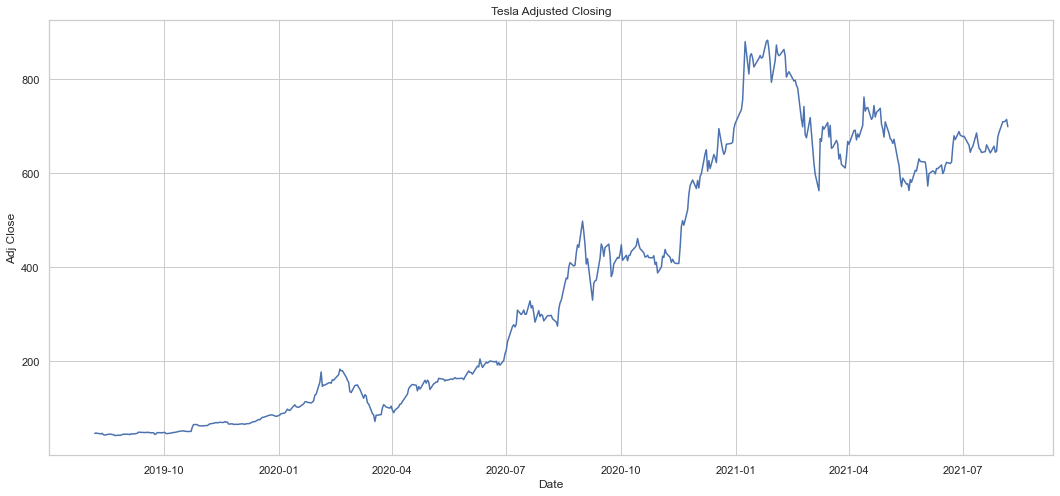

In [16]:
plt.figure(figsize=(18,8))
sns.set(style='whitegrid')
sns.lineplot(y='Adj Close',x='Date',data=TSLA)
plt.title("Tesla Adjusted Closing")
plt.show()

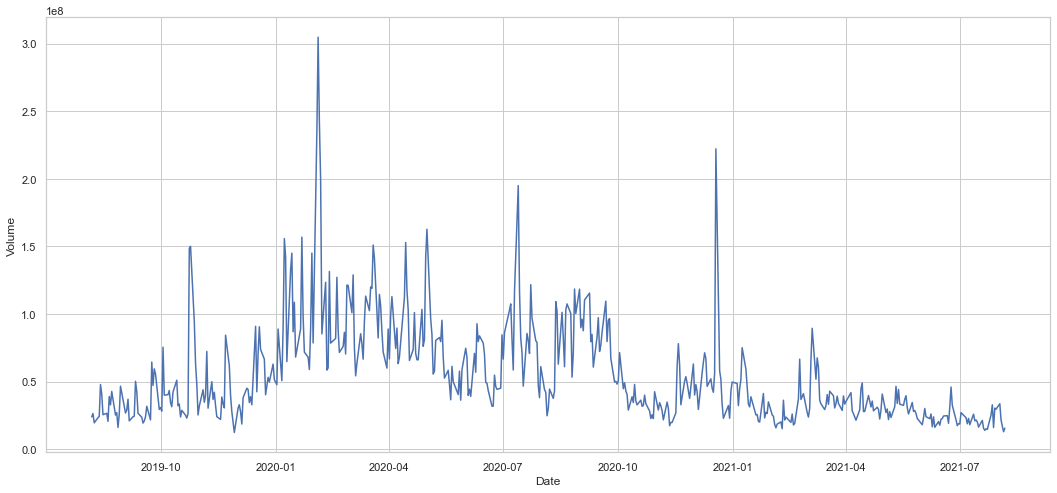

In [20]:
## Volume Trade Each day for Tesla
plt.figure(figsize=(18,8))
sns.lineplot(x='Date',y='Volume',data=TSLA)
plt.show()

In [21]:
## Moving Average for Tesla 
movings = [10,15,28,50]
for x in movings:
    col_name = f"{x}_avg"
    TSLA[col_name] = TSLA['Adj Close'].rolling(x).mean()

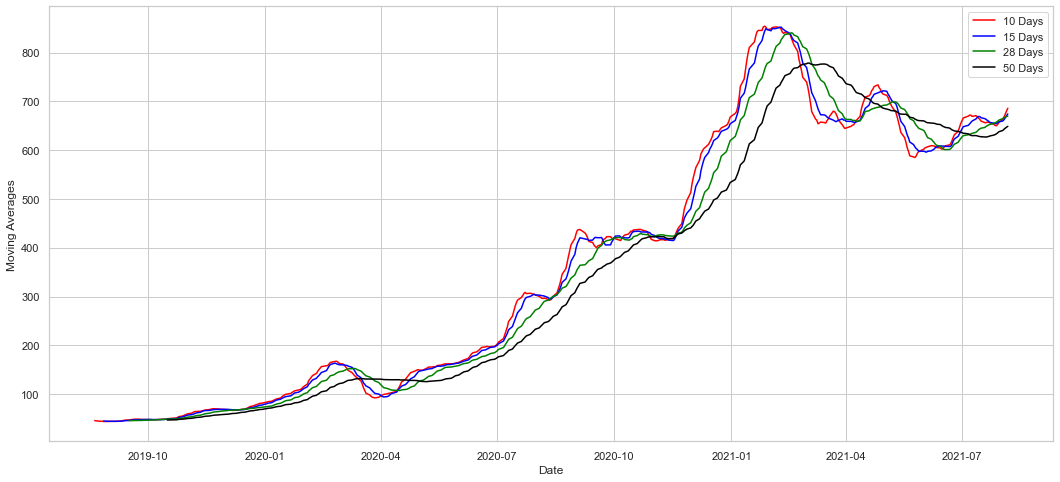

In [25]:
# Plot the graph
plt.figure(figsize=(18,8))
sns.lineplot(x='Date',y='10_avg',data=TSLA,color='red')
sns.lineplot(x='Date',y='15_avg',data=TSLA,color='blue')
sns.lineplot(x='Date',y='28_avg',data=TSLA,color='green')
sns.lineplot(x='Date',y='50_avg',data=TSLA,color='black')
plt.legend(labels=["10 Days","15 Days","28 Days","50 Days"])
plt.ylabel("Moving Averages")
plt.show()

In [27]:
# Daily returns for Tesla
TSLA['Daily Returns'] = TSLA['Adj Close'].pct_change()

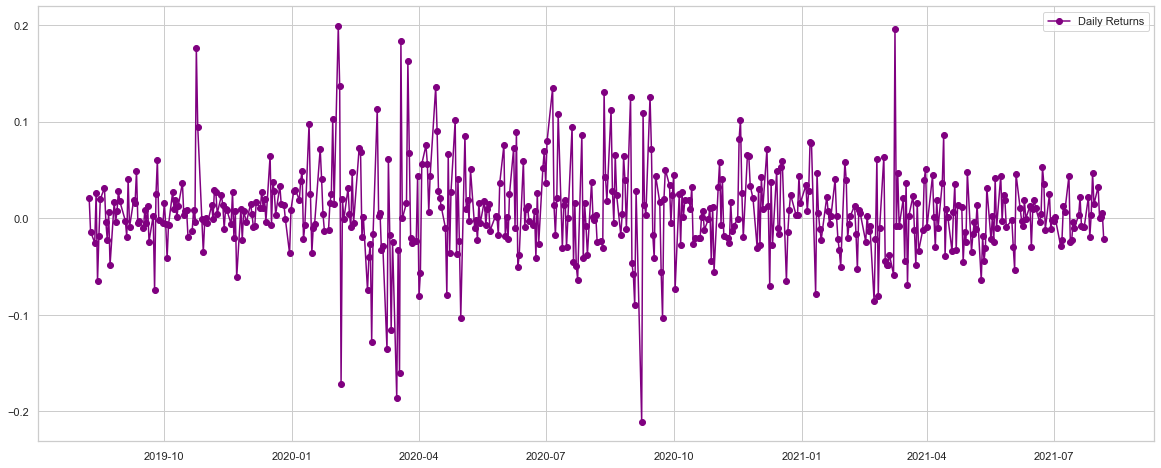

In [31]:
plt.figure(figsize=(20,8))
plt.plot(TSLA.index.values,TSLA['Daily Returns'],marker='o',color='purple')
plt.legend(['Daily Returns'])
plt.show()

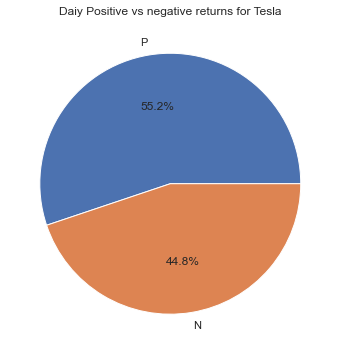

In [46]:
def tell_status(daily_ret):
    val = daily_ret
    if val > 0:
        return "P"
    elif val < 0:
        return "N"
    elif val == 0:
        return "Z"
    else:
        return np.NaN
TSLA['ret_status'] = TSLA['Daily Returns'].apply(tell_status)

## Daiy Positive vs negative returns for Tesla
plt.figure(figsize=(6,6))
plt.pie(TSLA['ret_status'].value_counts(),labels=TSLA['ret_status'].value_counts().index.values,autopct='%1.1f%%')
plt.title("Daiy Positive vs negative returns for Tesla")
plt.show()

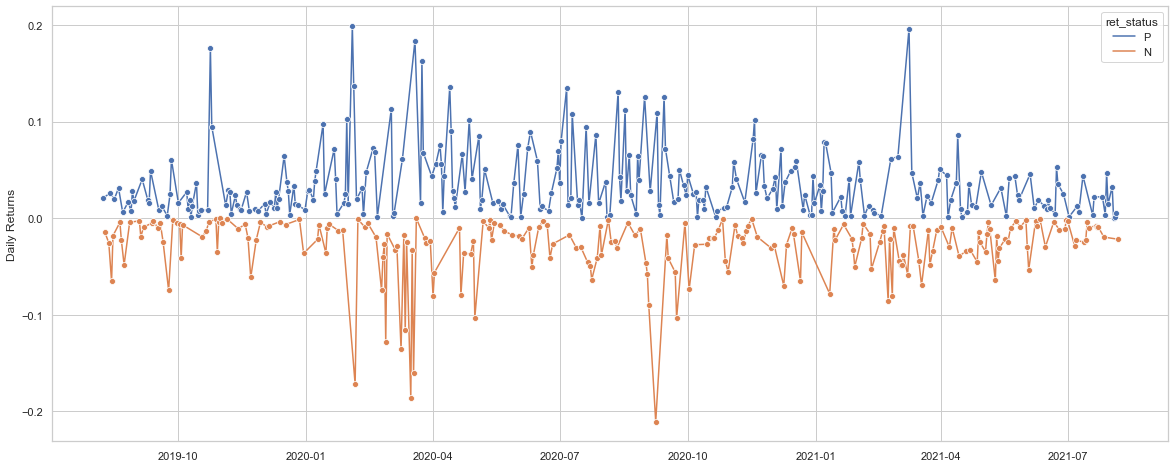

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(x= TSLA.index.values,y=TSLA['Daily Returns'],marker='o',hue=TSLA['ret_status'])
plt.show()

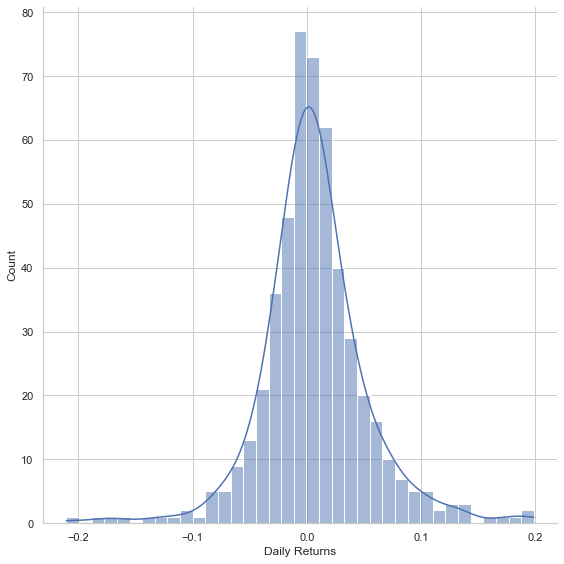

In [50]:
# Distribution for Tesla
sns.displot(TSLA['Daily Returns'],kde=True,height=8)

# Let's see if there is any correlation between Daily returns of these companies

In [80]:
# ['ORCL', 'TSLA', 'IBM','YELP','AMZN']
df_adjust_close = pd.DataFrame({"TSLA":TSLA['Adj Close'],"ORCL":ORCL['Adj Close'],"IBM":IBM['Adj Close'],"AMZN":AMZN['Adj Close']})
df_adjust_pct = df_adjust_close.pct_change()

In [81]:
df_adjust_pct = df_adjust_pct.dropna()

<AxesSubplot:>

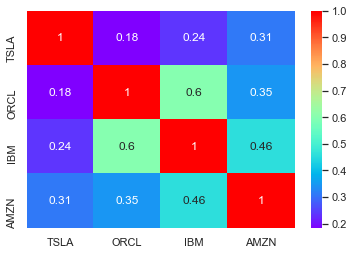

In [101]:
sns.heatmap(df_adjust_pct.dropna().corr(),annot=True,cmap='rainbow')

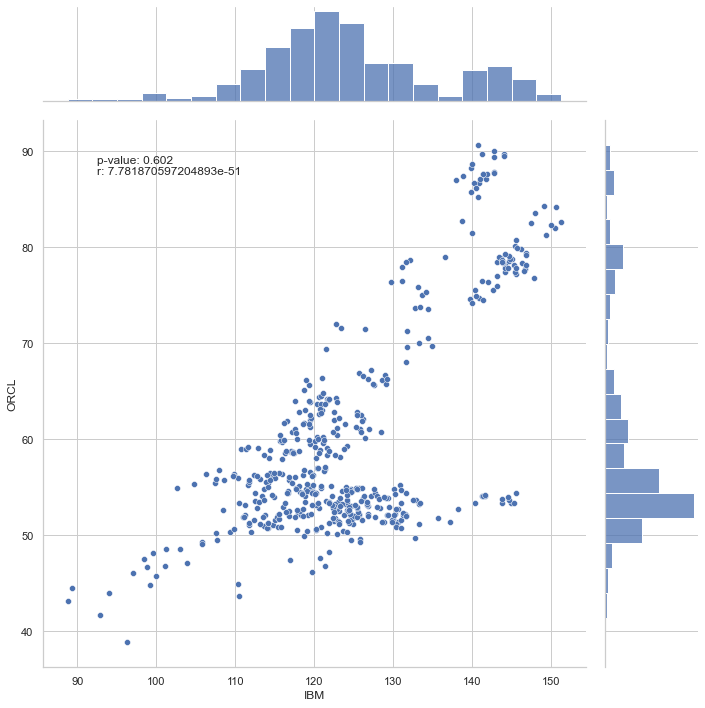

In [96]:
# IBM and amazon have highest correlation
from scipy import stats
pears,r = stats.pearsonr(df_adjust_pct['IBM'][1:],df_adjust_pct['ORCL'][1:])
j = sns.jointplot(x=df_adjust_close['IBM'],y=df_adjust_close['ORCL'],height=10)
j.ax_joint.annotate(f"p-value: {round(pears,3)}\nr: {r}",xy=(.1,.9),xycoords='axes fraction',)
plt.show()

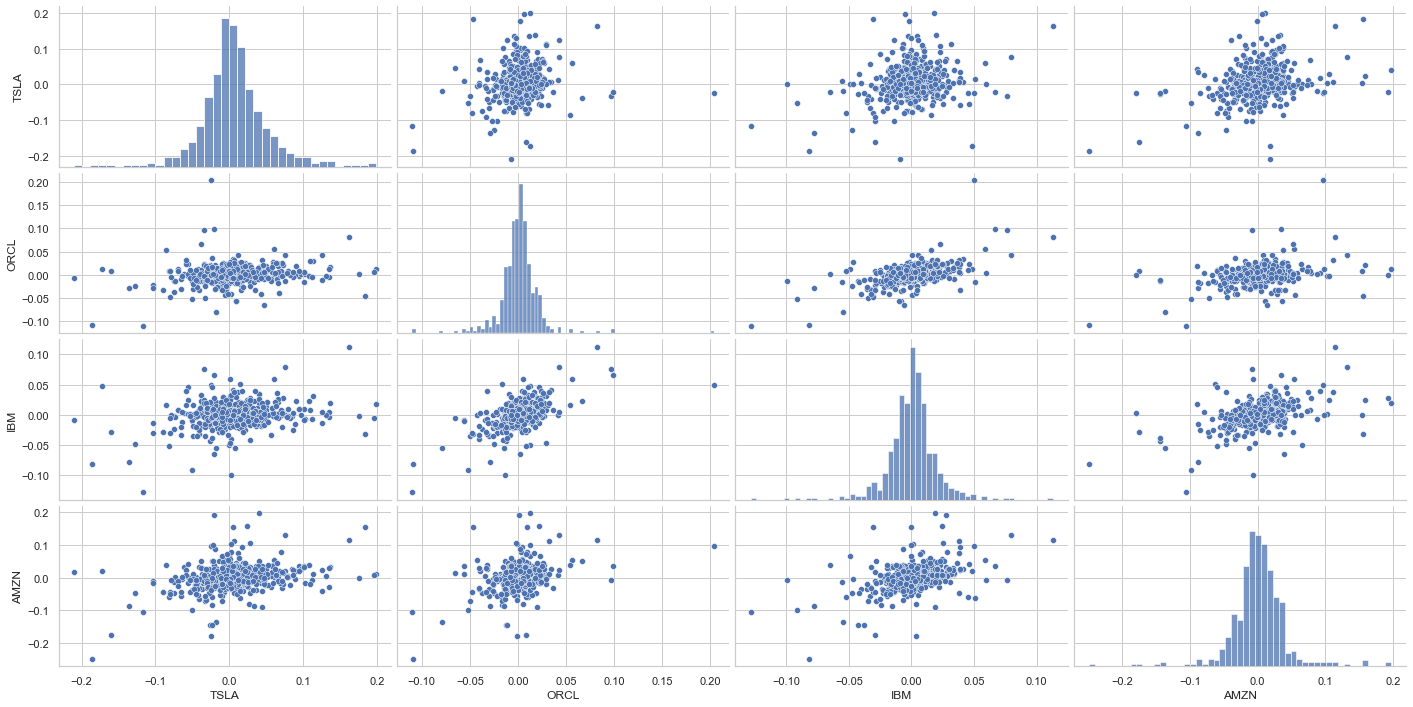

In [84]:
## To look at correlation maps for the whole companies dataset
sns.pairplot(data=df_adjust_pct,aspect=2)

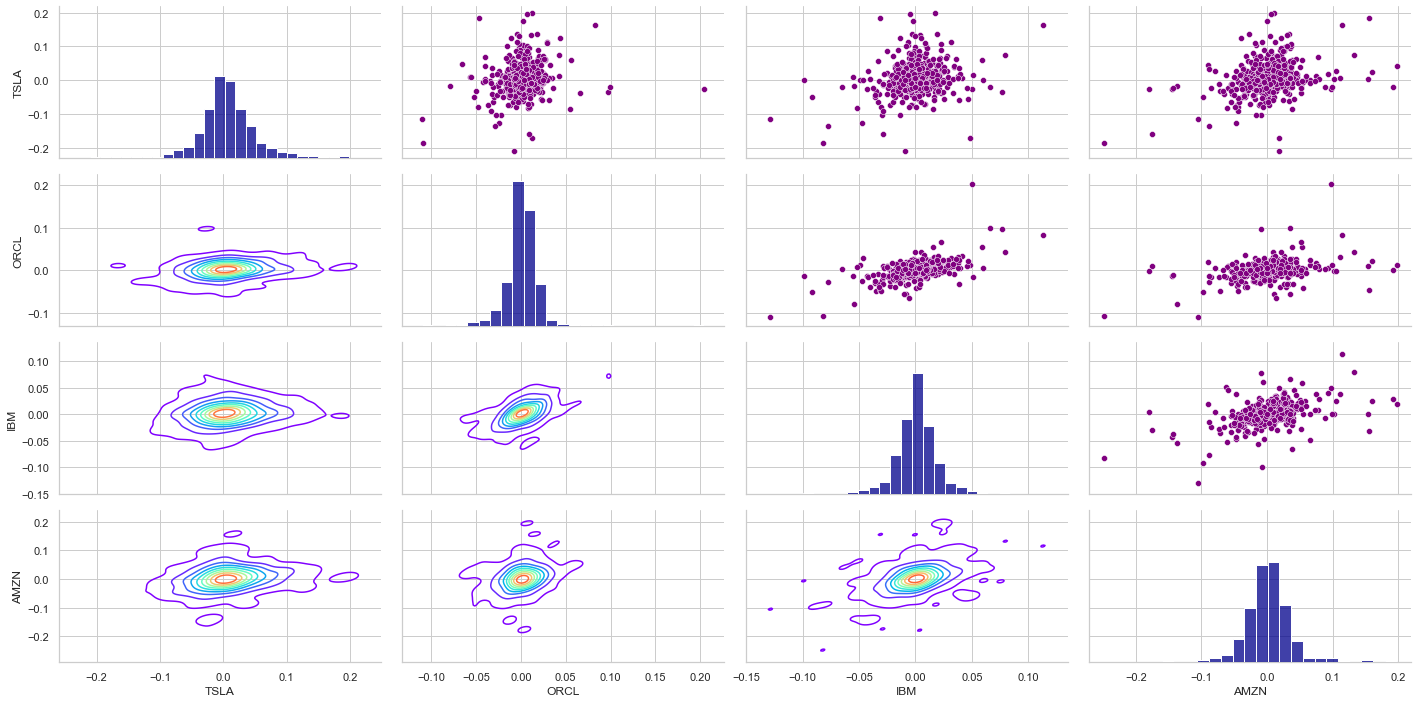

In [85]:
returns_figure = sns.PairGrid(df_adjust_pct.dropna(),aspect=2)
returns_figure.map_upper(sns.scatterplot,color='purple')
returns_figure.map_lower(sns.kdeplot,cmap='rainbow')
returns_figure.map_diag(sns.histplot,bins=25,color='darkblue')
plt.show()

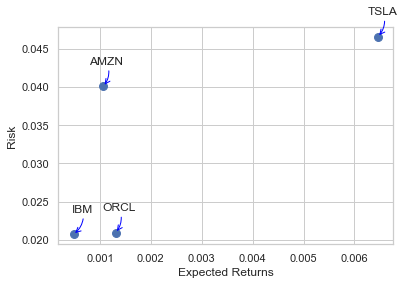

In [86]:
# Risk management
risks_data = df_adjust_pct.dropna()
area = np.pi*20

plt.scatter(risks_data.mean(),risks_data.std(),s=area)
plt.xlabel("Expected Returns")
plt.ylabel("Risk")

# https://matplotlib.org/1.5.3/users/annotations_guide.html
for label, x, y in zip(risks_data.columns, risks_data.mean(), risks_data.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->',color='blue', connectionstyle = 'arc3,rad=-0.3'))

## Value at risk
The amount of money we put in to loose in a given confidence level (95%)

In [87]:
[risks_data['AMZN'].quantile(0.05),risks_data['TSLA'].quantile(0.05),risks_data['IBM'].quantile(0.05),risks_data['ORCL'].quantile(0.05)]

[-0.05034804489623852,
 -0.058422394547441046,
 -0.0293449354922045,
 -0.02851119777003053]

## TSLA has the maximum value at risk 0.058

In [89]:
0.058422 * 1000000

58422.0

This means that 95% of times your loss wouldnt exceed 0.058422 times your investment
if you were to invest 100000 in Apple, 95% times your loss wouldnt exceed 58422.0

# If one was to invest 400000 in total divided equally then at 95% Confidence level the value at risk would be distributed as 

In [90]:
value_at_risks = pd.DataFrame(
    [risks_data['ORCL'].quantile(0.05),risks_data['TSLA'].quantile(0.05),risks_data['IBM'].quantile(0.05),risks_data['AMZN'].quantile(0.05)],
    index=['ORCL', 'TSLA', 'IBM','AMZN'],columns=['VaR']
)
value_at_risks['VaR'] = -value_at_risks['VaR']*100000
value_at_risks

,VaR
ORCL,2851.119777
TSLA,5842.239455
IBM,2934.493549
AMZN,5034.804490


In [92]:
value_at_risks['VaR'].sum()

16662.65727059146

Total Expected loss for the portfolio is 16662.65727059146<br>
As 100000 were invested in every stock the expected value at risk is 12220.616

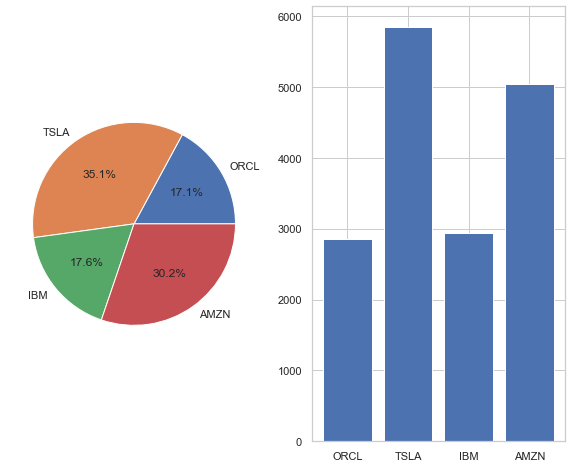

In [91]:
fig1,(a1,a2) = plt.subplots(1,2,figsize=(10,8))
a1.pie(value_at_risks['VaR'],labels=value_at_risks.index.values,autopct='%1.1f%%')
a2.bar(value_at_risks.index.values,value_at_risks['VaR'])
plt.show()

In [102]:
data.DataReader('AGC','yahoo')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,11.89,11.89,11.890,11.89,500,11.89
2020-12-02,12.48,11.82,12.480,11.82,1000,11.82
2020-12-03,11.90,11.80,11.820,11.90,14100,11.90
2020-12-04,13.98,11.50,12.990,12.40,15500,12.40
2020-12-07,14.00,12.20,13.150,12.55,14500,12.55
...,...,...,...,...,...,...
2021-08-02,10.96,10.82,10.890,10.86,267900,10.86
2021-08-03,11.16,10.71,11.120,10.82,284600,10.82
2021-08-04,10.93,10.66,10.919,10.70,382600,10.70
